#### Student Depression Variable Imputation

**Name:** Francisco Tejeda Figueroa


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Read Dataset

In [2]:
df = pd.read_csv('Synthetic_Data_Cleaning_example.csv')
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


#### Exploratory Data Analysis

In [3]:
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

Filas: 104, Columnas: 5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         103 non-null    float64
 1   Income      103 non-null    float64
 2   Gender      84 non-null     object 
 3   Registered  103 non-null    float64
 4   City        103 non-null    object 
dtypes: float64(3), object(2)
memory usage: 4.2+ KB


In [5]:
missing = df.isnull().sum()
print("Valores nulos por columna:\n", missing[missing > 0])

Valores nulos por columna:
 Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64


In [6]:
df.describe()

,Age,Income,Registered
count,103.000000,103.000000,103.000000
mean,29.573987,51079.867179,0.504854
std,13.137300,21167.304578,0.502421
min,-5.000000,-1000.000000,0.000000
25%,23.988273,37726.305475,0.000000
50%,28.843517,51028.444622,1.000000
75%,34.967142,58315.989946,1.000000
max,120.000000,200000.000000,1.000000


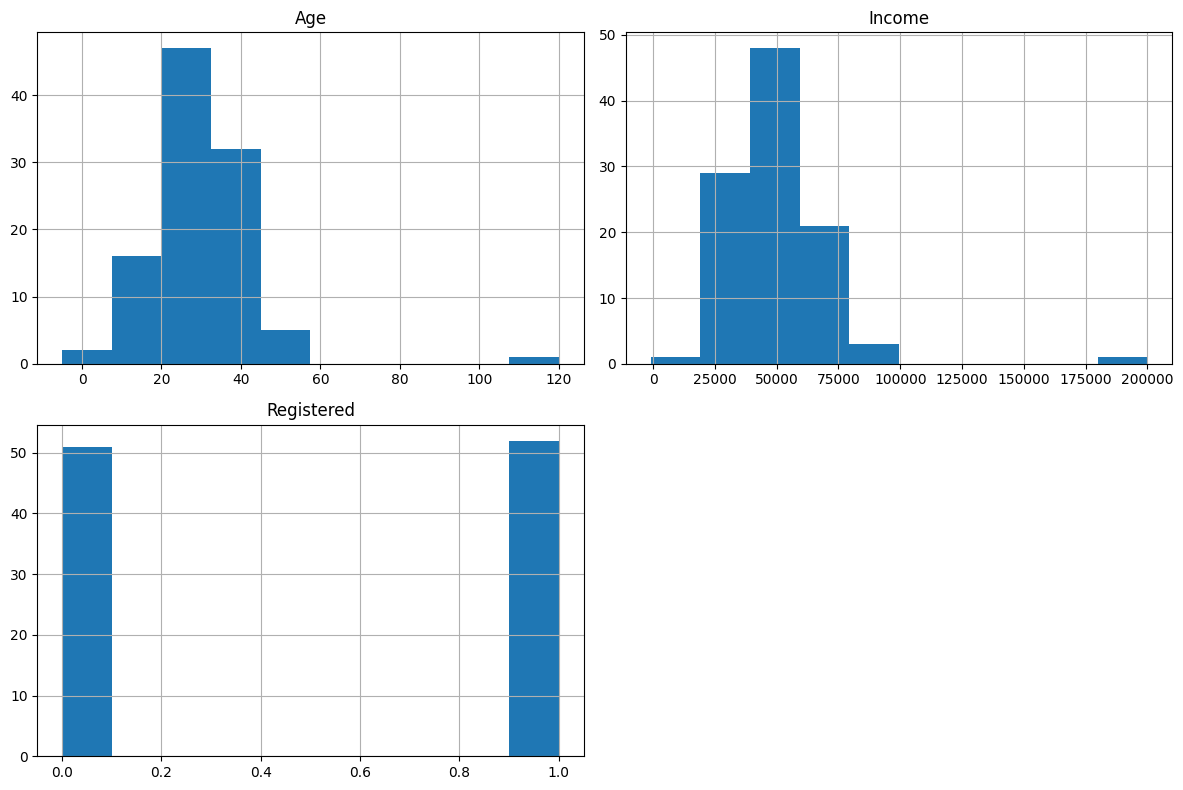

In [7]:
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

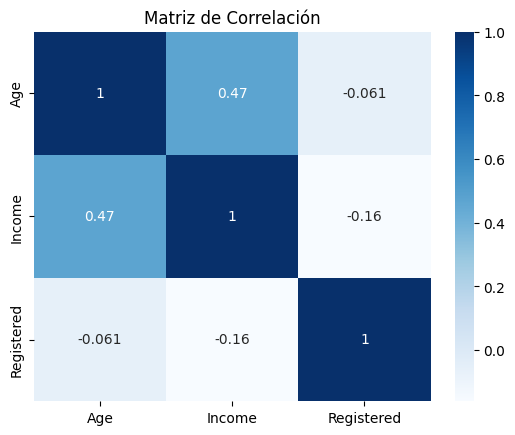

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Matriz de Correlación')
plt.show()

#### Data Cleaning

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [11]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [12]:
df.drop_duplicates(inplace=True)

### Feature Engineering

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cols = ['Income', 'Age']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])